In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
#Wczytanie danych
namez=["en", "eo", "et", "ht", "la", "nv", "so"]
language_data={}
for x in namez:
    language_data[x]=open(f"Texts/norm_wiki_{x}.txt").read()

In [3]:
#Redukcja tekstu do ciągu słów
def wordify(text):
    falka=text.split(' ')
    return tuple([x for x in falka if x!=''])

In [4]:
#Konstrukcja słownika z listy źródeł tekstowych sources, w słowniku dla każdego n-gramu o długości ln przechowywana
#jest, dla każdego słowa, informacja ile razy wystąpiło ono po danym n-gramie
def construct_wisdom_words(sources, ln=0):
    all_words={}
    for text in sources:
        words=wordify(text)
        
        for i, x in enumerate(words):
            if (i<ln):
                continue
            fragment=words[i-ln:i]
            if fragment not in all_words:
                all_words[fragment]={}
            if x not in all_words[fragment]:
                all_words[fragment][x]=0
            all_words[fragment][x]+=1
    return all_words


#Konstrukcja słownika z listy źródeł tekstowych sources, w słowniku dla każdego słowa o długości ln przechowywana
#jest, dla każdej litery, informacja ile razy wystąpiła ona po danym ciągu znaków
def construct_wisdom_letters(sources, ln=0):
    all_words={}
    for text in sources:
        for i, x in enumerate(text):
            if (i<ln):
                continue
            fragment=text[i-ln:i]
            if fragment not in all_words:
                all_words[fragment]={}
            if x not in all_words[fragment]:
                all_words[fragment][x]=0
            all_words[fragment][x]+=1
    return all_words

In [5]:
#Kalkulacja entropii - zwykłej i warunkowej
def calc_entropies_from_dict(dicto):
    cond_entropy, entropy, full_omega=0, 0, 0
    for x in dicto:
        partial_omega=sum([dicto[x][y] for y in dicto[x]])
        full_omega+=partial_omega
        cond_entropy+=sum([dicto[x][y]*math.log(dicto[x][y]/partial_omega, 2) for y in dicto[x]])
    cond_entropy/=full_omega
    for x in dicto:
        entropy+=sum([dicto[x][y]*math.log(dicto[x][y]/full_omega, 2) for y in dicto[x]])
    return -cond_entropy, -entropy/full_omega
    

In [6]:
#Tworzenie słownika z informacjami o entropiach dla znaków/słow i kilku rzędów - rzędy dla słow to tylko 0,1,2
#Albowiem ciągi większej ilości słów często będą unikalne
def make_report(data):
    all_data={}
    for x in data:
        all_data[x]={}
    for i in range(6):
        for x in data:
            dicto=construct_wisdom_letters([data[x]], i)
            cond_ent, ent=calc_entropies_from_dict(dicto)
            all_data[x][('letters', i, 'conditional_entropy')]=cond_ent
            all_data[x][('letters', i, 'entropy')]=ent
            
    for i in range(3):
        for x in data:
            dicto=construct_wisdom_words([data[x]], i)
            cond_ent, ent=calc_entropies_from_dict(dicto)
            all_data[x][('words', i, 'conditional_entropy')]=cond_ent
            all_data[x][('words', i, 'entropy')]=ent
    
    for x in all_data:
        print(f'{"#"*20} {x} {"#"*20}')
        _=[print(y, all_data[x][y]) for y in all_data[x]]
    return all_data

In [7]:
report_original=make_report(language_data)

#################### en ####################
('letters', 0, 'conditional_entropy') 4.288221453845131
('letters', 0, 'entropy') 4.288221453845131
('letters', 1, 'conditional_entropy') 3.516604798986026
('letters', 1, 'entropy') 7.804826411532962
('letters', 2, 'conditional_entropy') 3.0183191907911224
('letters', 2, 'entropy') 10.823145384445619
('letters', 3, 'conditional_entropy') 2.48156591957609
('letters', 3, 'entropy') 13.304710947301425
('letters', 4, 'conditional_entropy') 2.0211849323237328
('letters', 4, 'entropy') 15.325895444138851
('letters', 5, 'conditional_entropy') 1.6724087187938674
('letters', 5, 'entropy') 16.998303583244997
('words', 0, 'conditional_entropy') 11.543993773638464
('words', 0, 'entropy') 11.543993773638464
('words', 1, 'conditional_entropy') 6.3891750659557385
('words', 1, 'entropy') 17.933166688417472
('words', 2, 'conditional_entropy') 2.176460456200642
('words', 2, 'entropy') 20.10962475451606
#################### eo ####################
('letters', 

In [8]:
#Wczytanie 2. części danych - sample
to_check_data={}
all_data=6
for i in range(all_data):
    to_check_data[i]=open(f"Texts/sample{i}.txt").read()

In [9]:
report_to_check=make_report(to_check_data)

#################### 0 ####################
('letters', 0, 'conditional_entropy') 4.273001240566633
('letters', 0, 'entropy') 4.273001240566633
('letters', 1, 'conditional_entropy') 2.9158940043478916
('letters', 1, 'entropy') 7.188895299196327
('letters', 2, 'conditional_entropy') 2.0003592449348755
('letters', 2, 'entropy') 9.189254749476554
('letters', 3, 'conditional_entropy') 1.5392818308881446
('letters', 3, 'entropy') 10.72853670510745
('letters', 4, 'conditional_entropy') 1.4385817627111173
('letters', 4, 'entropy') 12.167118623165575
('letters', 5, 'conditional_entropy') 1.391968427744908
('letters', 5, 'entropy') 13.559087417556292
('words', 0, 'conditional_entropy') 7.748741386140118
('words', 0, 'entropy') 7.748741386140118
('words', 1, 'conditional_entropy') 7.486391705241945
('words', 1, 'entropy') 15.23513271245221
('words', 2, 'conditional_entropy') 4.406703462203542
('words', 2, 'entropy') 19.641835755674048
#################### 1 ####################
('letters', 0, 'c

In [10]:
#Pokazanie danych w przystępniejszym formacie
def parse_wisdom(result_dict, value):
    mapp={'letters':'litery', 'words':'słowa', 'en':'angielskiego korpusu', 'la':'łacińskiego korpusu'}
    
    print(f'{"#"*20} entropie warunkowe dla {mapp[value]} {"#"*20}')
    _=[print(f'{mapp[x[0]]}, rząd {x[1]}, wartość {result_dict[value][x]}') for x in result_dict[value] if x[2]=='conditional_entropy']
    print(f'{"#"*20} entropie dla  {mapp[value]} {"#"*20}')
    _=[print(f'{mapp[x[0]]}, rząd {x[1]}, wartość {result_dict[value][x]}') for x in result_dict[value] if x[2]=='entropy']

In [11]:
#Rozwiązanie zadania 1.
parse_wisdom(report_original, 'en')

#################### entropie warunkowe dla angielskiego korpusu ####################
litery, rząd 0, wartość 4.288221453845131
litery, rząd 1, wartość 3.516604798986026
litery, rząd 2, wartość 3.0183191907911224
litery, rząd 3, wartość 2.48156591957609
litery, rząd 4, wartość 2.0211849323237328
litery, rząd 5, wartość 1.6724087187938674
słowa, rząd 0, wartość 11.543993773638464
słowa, rząd 1, wartość 6.3891750659557385
słowa, rząd 2, wartość 2.176460456200642
#################### entropie dla  angielskiego korpusu ####################
litery, rząd 0, wartość 4.288221453845131
litery, rząd 1, wartość 7.804826411532962
litery, rząd 2, wartość 10.823145384445619
litery, rząd 3, wartość 13.304710947301425
litery, rząd 4, wartość 15.325895444138851
litery, rząd 5, wartość 16.998303583244997
słowa, rząd 0, wartość 11.543993773638464
słowa, rząd 1, wartość 17.933166688417472
słowa, rząd 2, wartość 20.10962475451606


In [12]:
#Rozwiązanie zadania 2.
parse_wisdom(report_original, 'la')

#################### entropie warunkowe dla łacińskiego korpusu ####################
litery, rząd 0, wartość 4.228247465746815
litery, rząd 1, wartość 3.450126059614427
litery, rząd 2, wartość 2.8234920125311205
litery, rząd 3, wartość 2.152031337421168
litery, rząd 4, wartość 1.6427637761384617
litery, rząd 5, wartość 1.3127474600541682
słowa, rząd 0, wartość 11.969194044385533
słowa, rząd 1, wartość 4.400025431241772
słowa, rząd 2, wartość 1.1668830347272796
#################### entropie dla  łacińskiego korpusu ####################
litery, rząd 0, wartość 4.228247465746815
litery, rząd 1, wartość 7.678373615551551
litery, rząd 2, wartość 10.501865602980658
litery, rząd 3, wartość 12.653897073886606
litery, rząd 4, wartość 14.296661121958763
litery, rząd 5, wartość 15.609408960998167
słowa, rząd 0, wartość 11.969194044385533
słowa, rząd 1, wartość 16.369222451131694
słowa, rząd 2, wartość 17.536110506577945


In [13]:
#Wykresy tworzone, aby zwizualizować dane
def show_plots(report):
    systems=[['letters', 'conditional_entropy', 'Entropia warunkowa dla liter', 'Wartość entropii warunkowej', 6], 
        ['letters', 'entropy', 'Entropia dla liter', 'Wartość entropii', 6], 
        ['words', 'conditional_entropy', 'Entropia warunkowa dla słów', 'Wartość entropii warunkowej', 3], 
        ['words', 'entropy', 'Entropia dla słów', 'Wartość entropii', 3], 
    ]
    
    for j, z in enumerate(systems):
        data_ce_letters=[[report[x][y] for y in report[x] if y[0]==z[0] and y[2]==z[1]] for x in report]
        fig, ax=plt.subplots(1, 1, figsize=(18, 18))
        ax.set_title(z[2])
        if j%2==0:
            for i in range(1, 5):
                ax.axhline(i+0.5, color='gray', ls='--')
        ax.set_xlabel('Rząd przybliżenia')
        ax.set_ylabel(z[3])
        for label, x in zip(report.keys(), data_ce_letters):
            ax.plot(list(range(z[4])), x, label=label)
        ax.legend()
        plt.show()

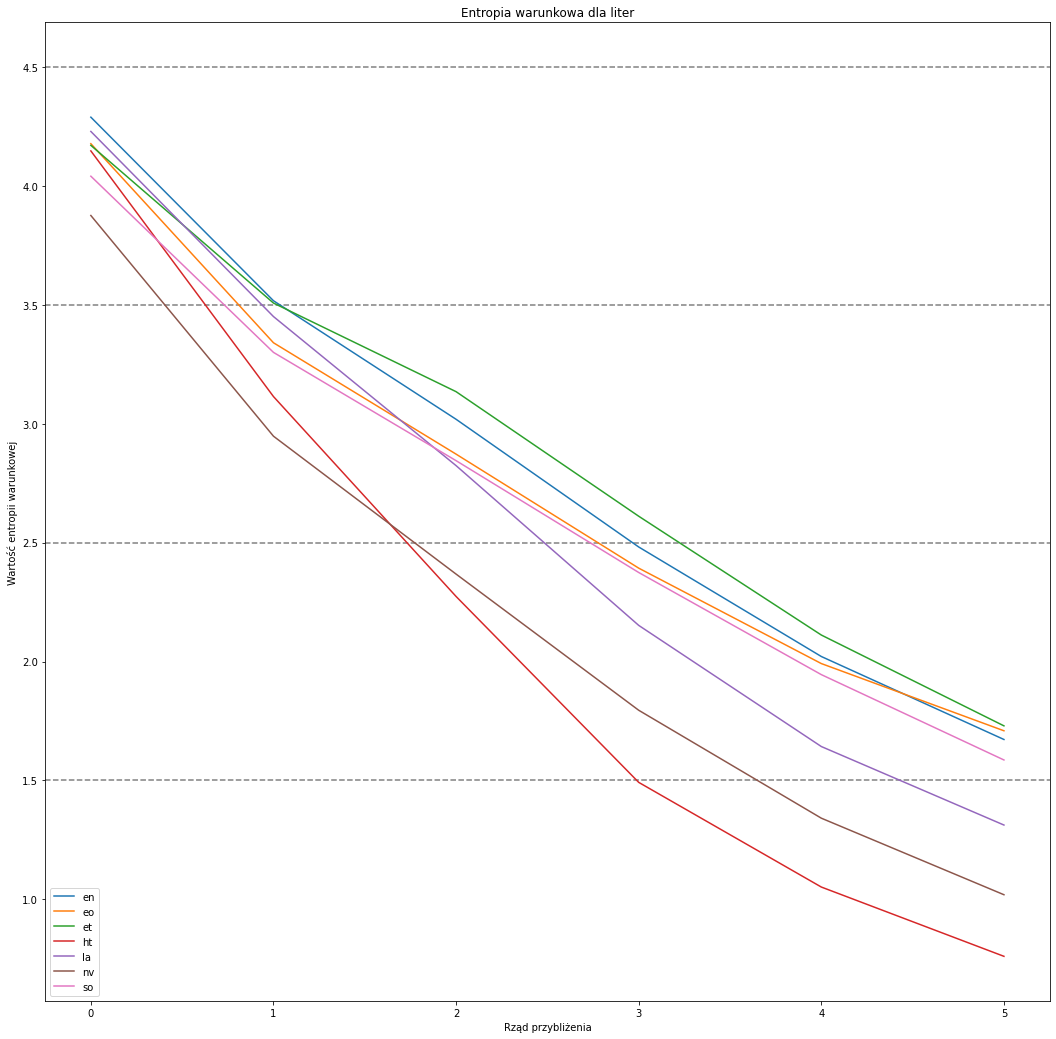

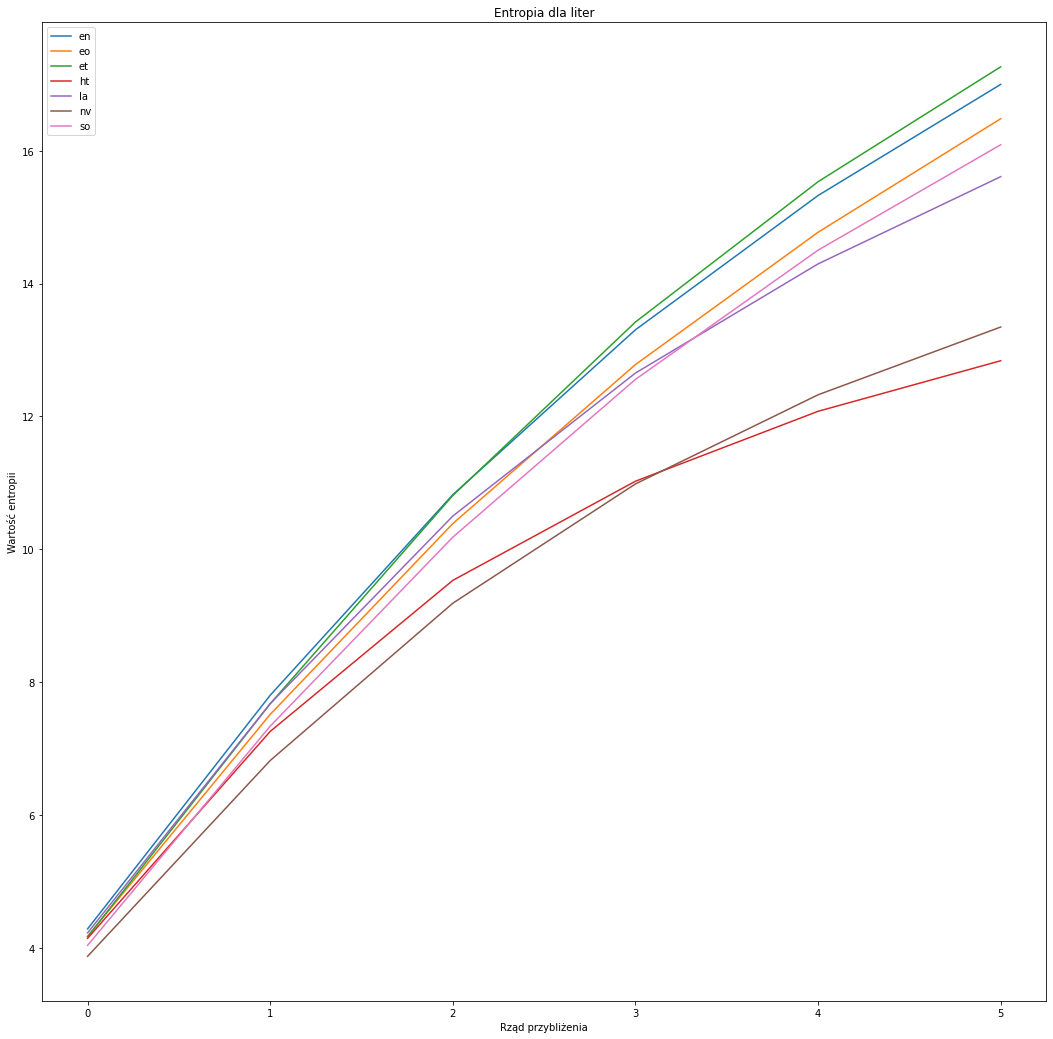

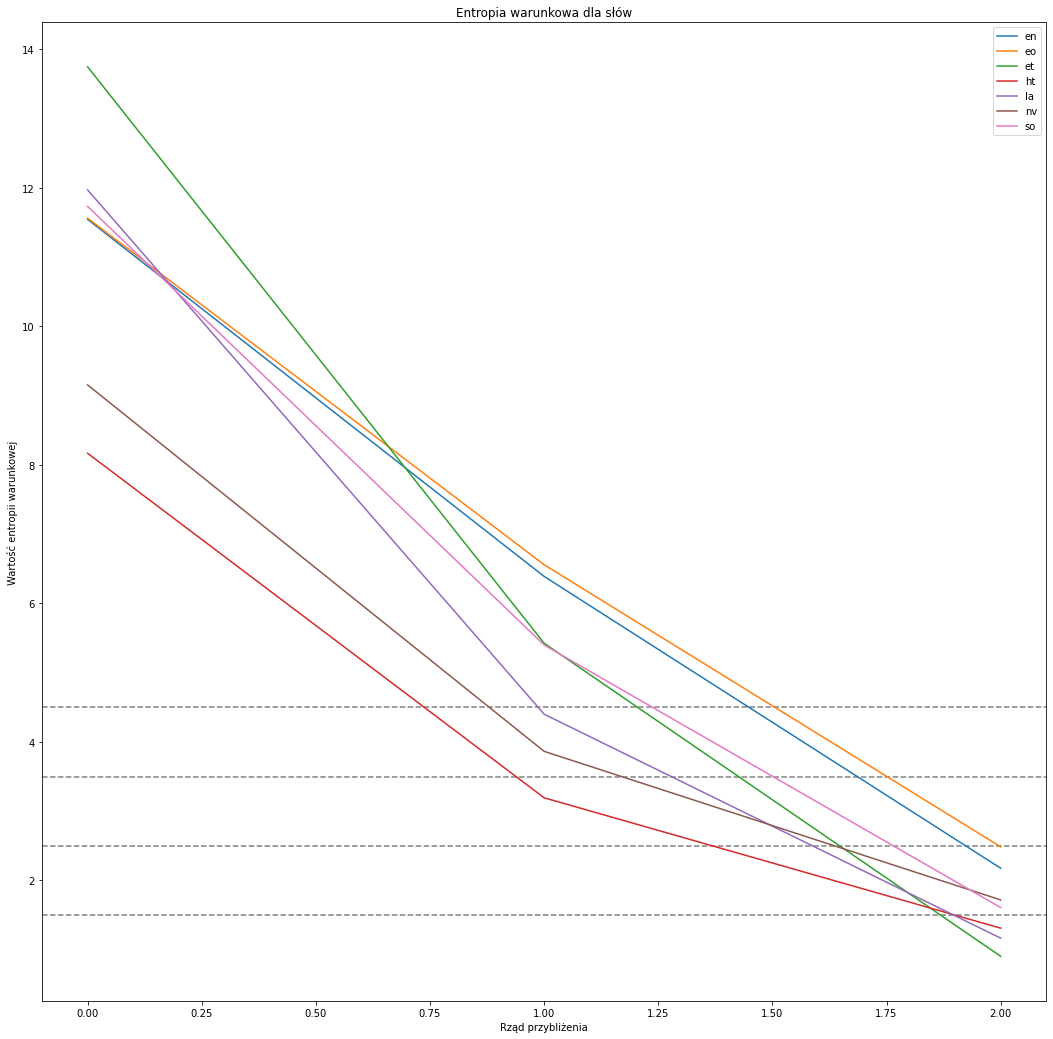

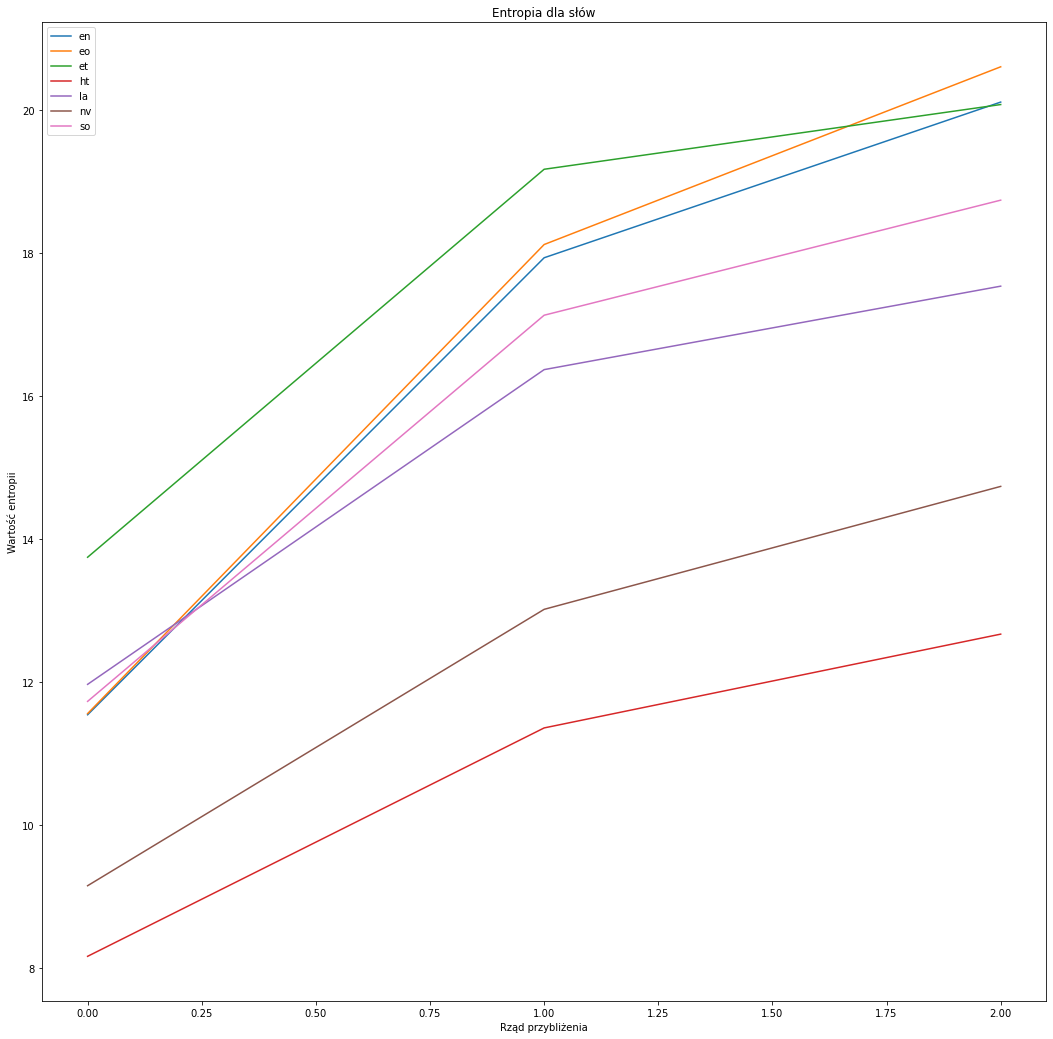

In [14]:
show_plots(report_original)

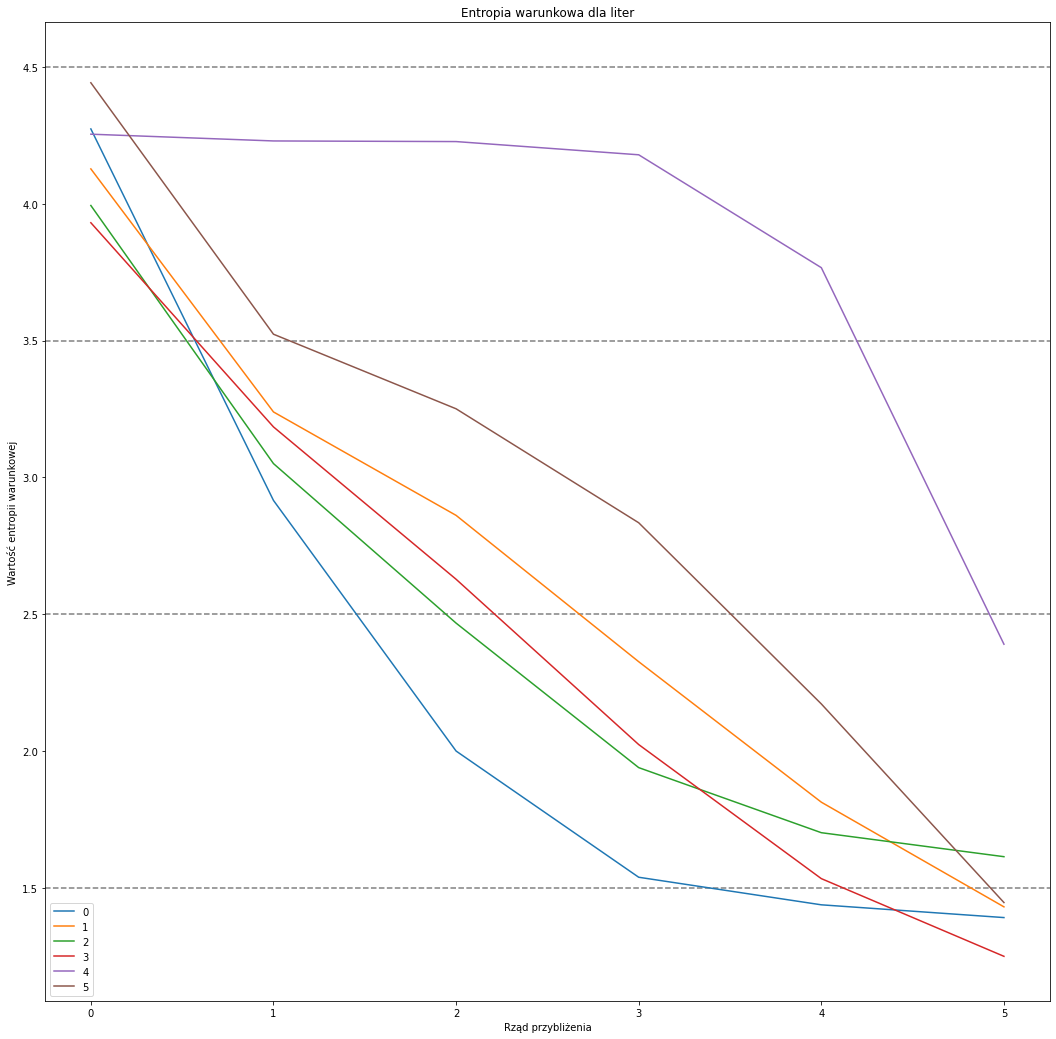

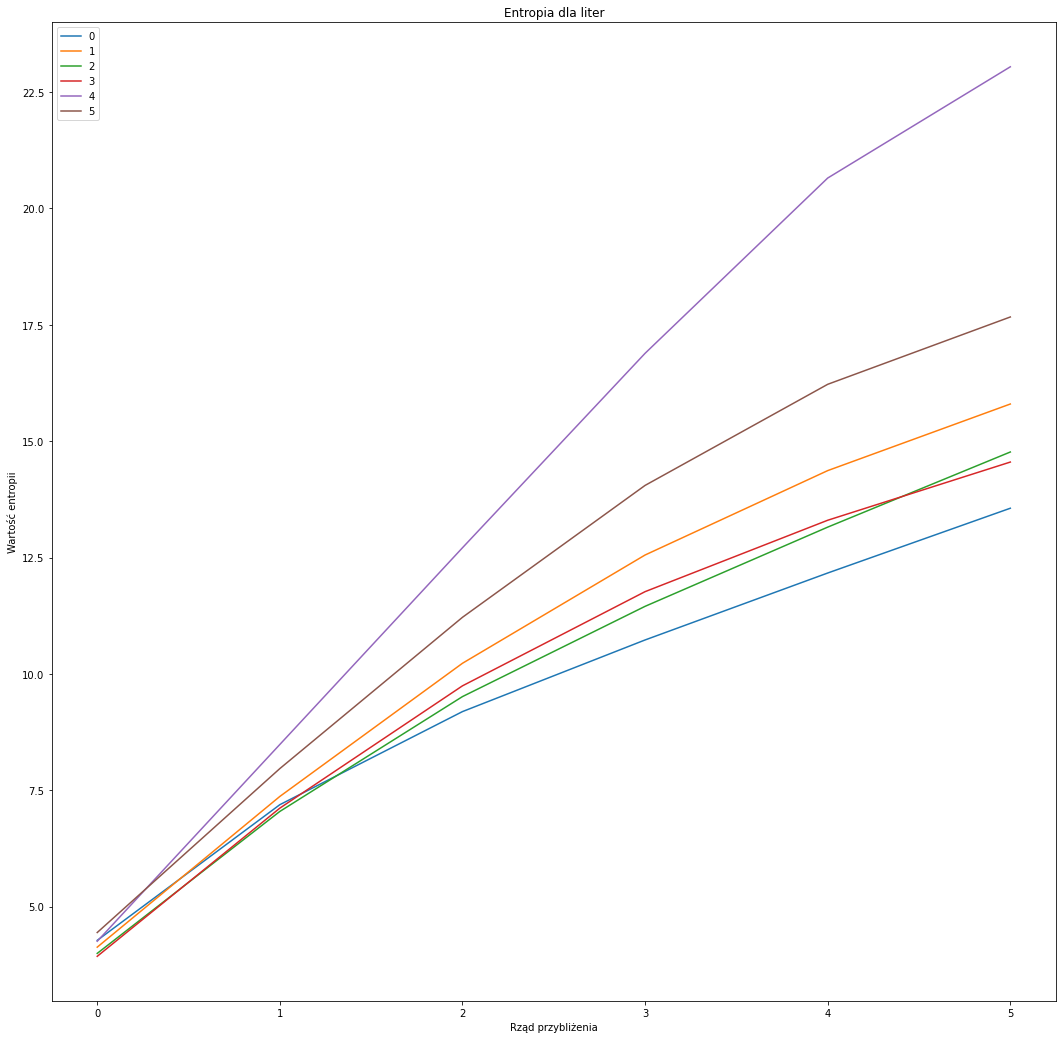

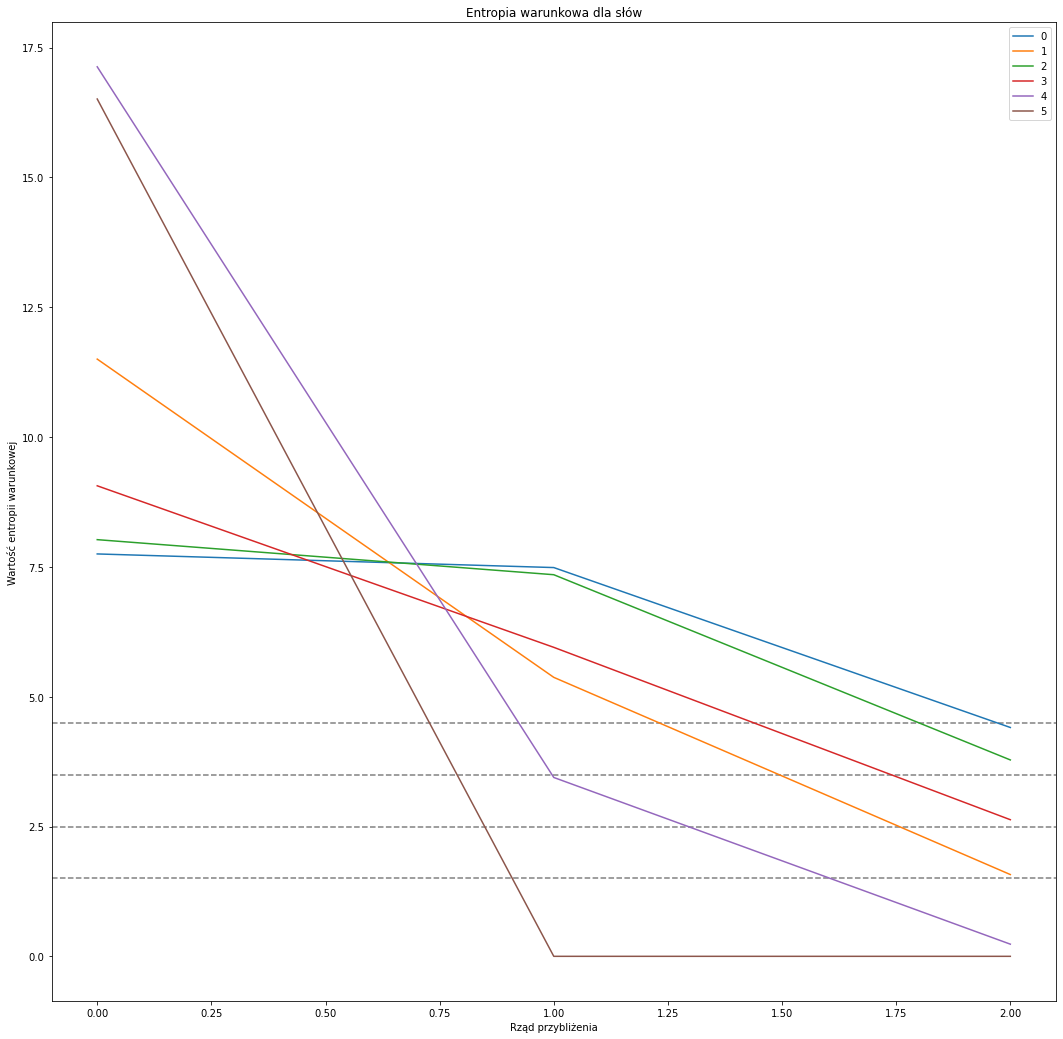

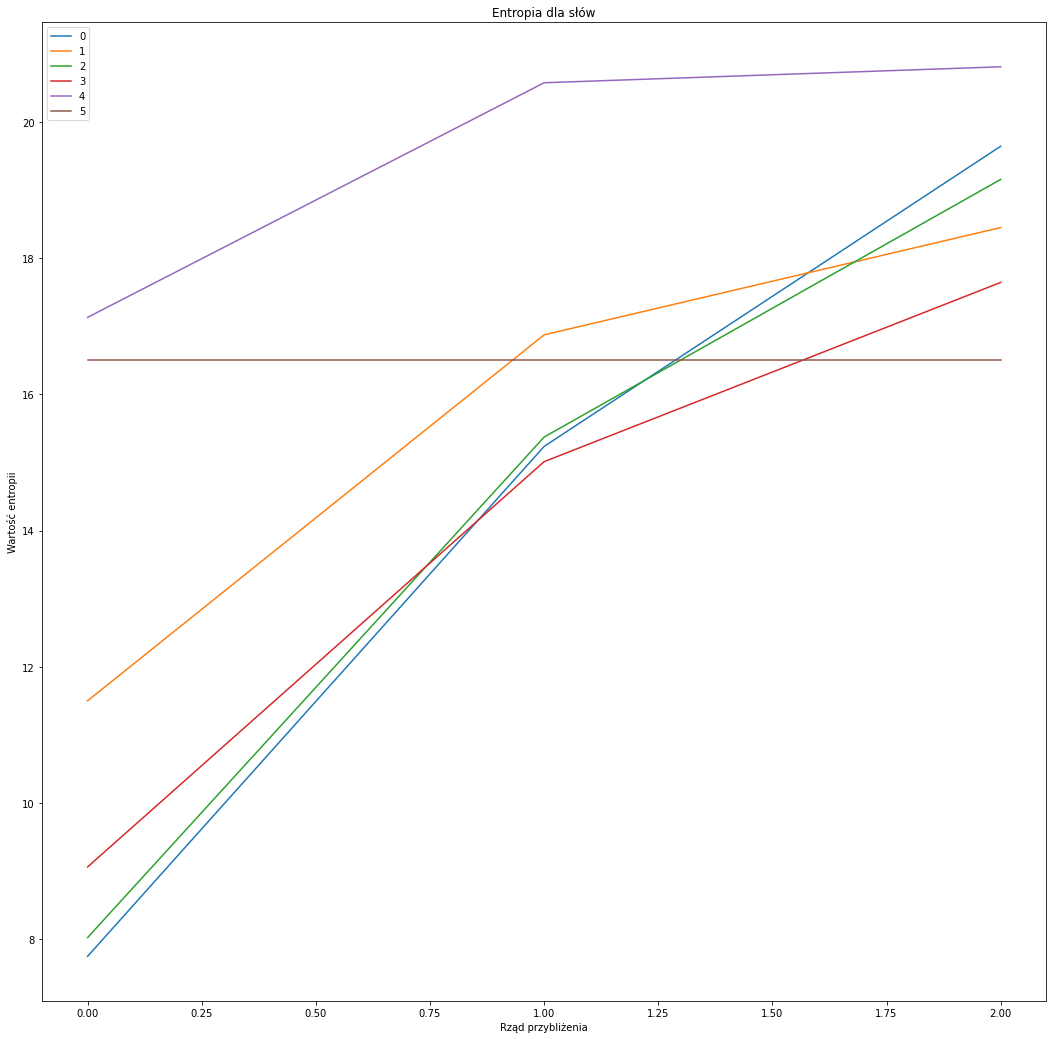

In [15]:
show_plots(report_to_check)

Wnioski:

sample0.txt - plik nie zawiera języka naturalnego - jeden z dwóch plików trudnych do zidentyfikowania, entropia warukowa dla rzędu przybliżenia 1 słowa jest prawie taka sama jak dla 0 słow, czyli 1 słowo daje praktycznie taką samą informację o kolejnym słowie jak żadne słowo, co jest nienaturalne, ponadto wysoka wartość entropii warunkowej dla rzędu przybliżenia 2 słów (wyższa niż 4.0 - w językach naturalnych niecałe 2.0) i niewielki spadek entropii warunkowej dla rzędu przybliżenia od 3 liter w górę - 3 poprzednie litery dają prawie taką samą wiedzę o kolejnym słowie jak 5 poprzednich liter, co jest nienaturalne.

sample1.txt, sample3.txt - pliki zawierają języki naturalne - sample1 ma bardzo podobne wartości entropii warunkowej do języków naturalnych zarówno dla słow, jak i dla liter, sample3.txt ma niewiele wyższą entropię warunkową dla rzędu przybliżenia 2 słów niż najwyższa z tych wartości dla języków naturalnych, ale różnica jest niewielka (niższa niż 0.25)

sample2.txt - plik nie zawiera języka naturalnego - jeden z dwóch plików trudnych do zidentyfikowania, uznany za niezawierający języka naturalnego z tych samych powodów co sample0.txt, przy czym entropia warunkowa dla rzędu przybliżenia 2 słów jest tutaj niższa niż 4.0 (dokładnie 3.78) - co i tak odbiega od języków naturalnych (najwyższa wartość rzędu 2.5).

sample4.txt - plik nie zawiera języka naturalnego - entropia warunkowa dla rzędu przybliżenia 0 liter jest prawie taka sama jak dla rzędu przybliżenia wynoszącego 3 litery, czyli 3 litery dają praktycznie taką samą informację o 4. literze jak żadna litera, co jest nienaturalne

sample5.txt - plik nie zawiera języka naturalnego - entropia warunkowa dla rzędu przybliżenia 1 słowa wynosi 0 co oznacza, że 1 słowo zawsze determinuje kolejne słowo w tym korpusie - co jest nienaturalne nawet, jeśli korpus byłby bardzo mały (a nie jest)